In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install plotly
%pip install nbformat --upgrade
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbformat in c:\python312\lib\site-packages (5.10.4)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df = pd.read_csv("owid-energy-data.csv")

print(df.head())

         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      


**Objective of the Analysis**

The aim of this analysis is to examine how various factors related to energy production and consumption are interconnected with other aspects such as economic development, geographical location, and environmental considerations. Using examples from different countries and regions, we will explore which energy sources may indicate crises. Additionally, we aim to determine whether environmental sustainability is directly correlated with a high level of development.

In [209]:
import numpy as np
import plotly.express as px


df["greenhouse_gas_emissions_log"] = np.log1p(df["greenhouse_gas_emissions"])
df["carbon_intensity_elec_log"] = df["carbon_intensity_elec"]
df["energy_per_capita_log"] = df["primary_energy_consumption"] * 1000 / df["population"]

min_val = df["energy_per_capita_log"].min()
max_val = df["energy_per_capita_log"].max()
print("Min:", df["energy_per_capita_log"].min())
print("Max:", df["energy_per_capita_log"].max())


fig1 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="energy_per_capita_log",
    color_continuous_scale="Plasma",
    range_color=[min_val, 0.085],
    title="Energy per Capita (log) - it is possible to zoom "
)
fig1.show()


fig2 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="greenhouse_gas_emissions_log",
    color_continuous_scale="Plasma_r",
    range_color=[0, 6],
    title="GreenHouse emissions (log)"
)
fig2.show()

fig3 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="carbon_intensity_elec_log",
        range_color=[0, 800],
    color_continuous_scale="Plasma_r",
    title="Carbon intensity (log)"
)
fig3.show()

fig4 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="renewables_share_elec",
    color_continuous_scale="Plasma",
    title="Persentage of renowable energy"
)
fig4.show()


Min: 0.0
Max: 0.657536303986633


**Exploring Energy Consumption and Environmental Sustainability****

To begin, we will visualize the issue of non-sustainable energy consumption on a map and attempt to identify patterns that could serve as a solid foundation for further analysis.

It is already evident that identifying direct correlations is challenging, as exceptions frequently arise. However, what if we consider pairs of factors collectively? The first factor, which I consider pivotal in this analysis, represents the amount of energy consumed per capita in a given country.

For instance, in European countries (zooming in on the map reveals finer details), we can observe that nations with higher GDP levels tend to consume substantial amounts of energy while maintaining low to moderate levels of emissions.

To delve deeper, I aim to construct a heatmap to determine the extent to which data on energy sustainability correlates with levels of development. Moreover, I intend to assess whether per capita energy consumption exhibits a stronger correlation than factors such as environmental sustainability or total energy production.

In [14]:

df["gdp_per_capita"] = df["gdp"] / df["population"]
df["gas_export"] = df["gas_production"] / df["gas_consumption"]
selected_columns = ["energy_per_capita_log", "gdp_per_capita", "population", "low_carbon_cons_change_pct", "low_carbon_energy_per_capita",
                     "greenhouse_gas_emissions", "carbon_intensity_elec", 
                     "oil_energy_per_capita","oil_consumption", 
                     "gas_energy_per_capita", "gas_consumption", 
                     "coal_cons_per_capita","coal_consumption", "gas_export", 
                     "solar_share_elec", "solar_consumption",
                     "biofuel_elec_per_capita", "biofuel_consumption", 
                     "hydro_energy_per_capita","hydro_share_energy", 
                     "renewables_share_elec", "wind_energy_per_capita", "wind_share_energy"]
df_heatmap = df[selected_columns].copy()

corr_matrix = df_heatmap.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="BuPu",
    title="Correlation Matrix"
)

fig.update_layout(width=1920, height=1000)
fig.show()





Observations from the Heatmap

The heatmap reveals a range of correlations worthy of further analysis. These patterns provide a foundation for deeper investigation, helping to uncover the underlying relationships between energy consumption, sustainability, and development indicators.

Firstly, the factor of per capita energy consumption shows a correlation with GDP per capita that is comparable to the correlation observed with per capita gas production.

Mean Squared Error: 116449488.21828152


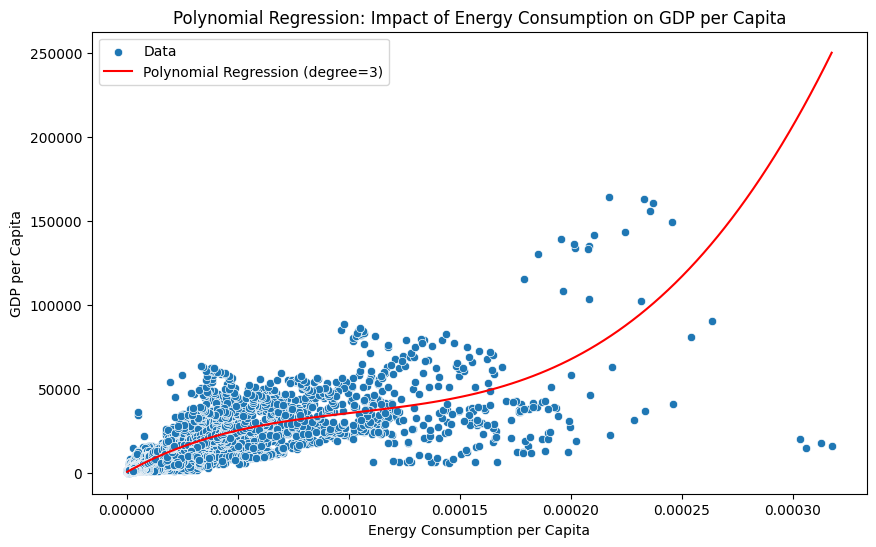

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df["energy_per_capita"] = df["primary_energy_consumption"] / df["population"]
df["gdp_per_capita"] = df["gdp"] / df["population"]


df_regr = df.dropna(subset=["energy_per_capita", "gdp_per_capita"])


X = df_regr[["energy_per_capita"]].values  
y = df_regr["gdp_per_capita"].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(10, 6))
sns.scatterplot(x="energy_per_capita", y="gdp_per_capita", data=df, label="Data")


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)


plt.plot(X_range, y_range_pred, color="red", label="Polynomial Regression (degree=3)")
plt.xlabel("Energy Consumption per Capita")
plt.ylabel("GDP per Capita")
plt.title("Polynomial Regression: Impact of Energy Consumption on GDP per Capita")
plt.legend()
plt.show()




Gas production is closely tied to a country's economic and political development. Its extraction and transportation are labor-intensive processes, which is why high levels of gas production are typically characteristic of developed nations.

However, energy consumption tends to be more stable over time and is less susceptible to the effects of political and economic crises or external trade instability. This makes per capita energy consumption a potentially more reliable indicator for long-term analysis.

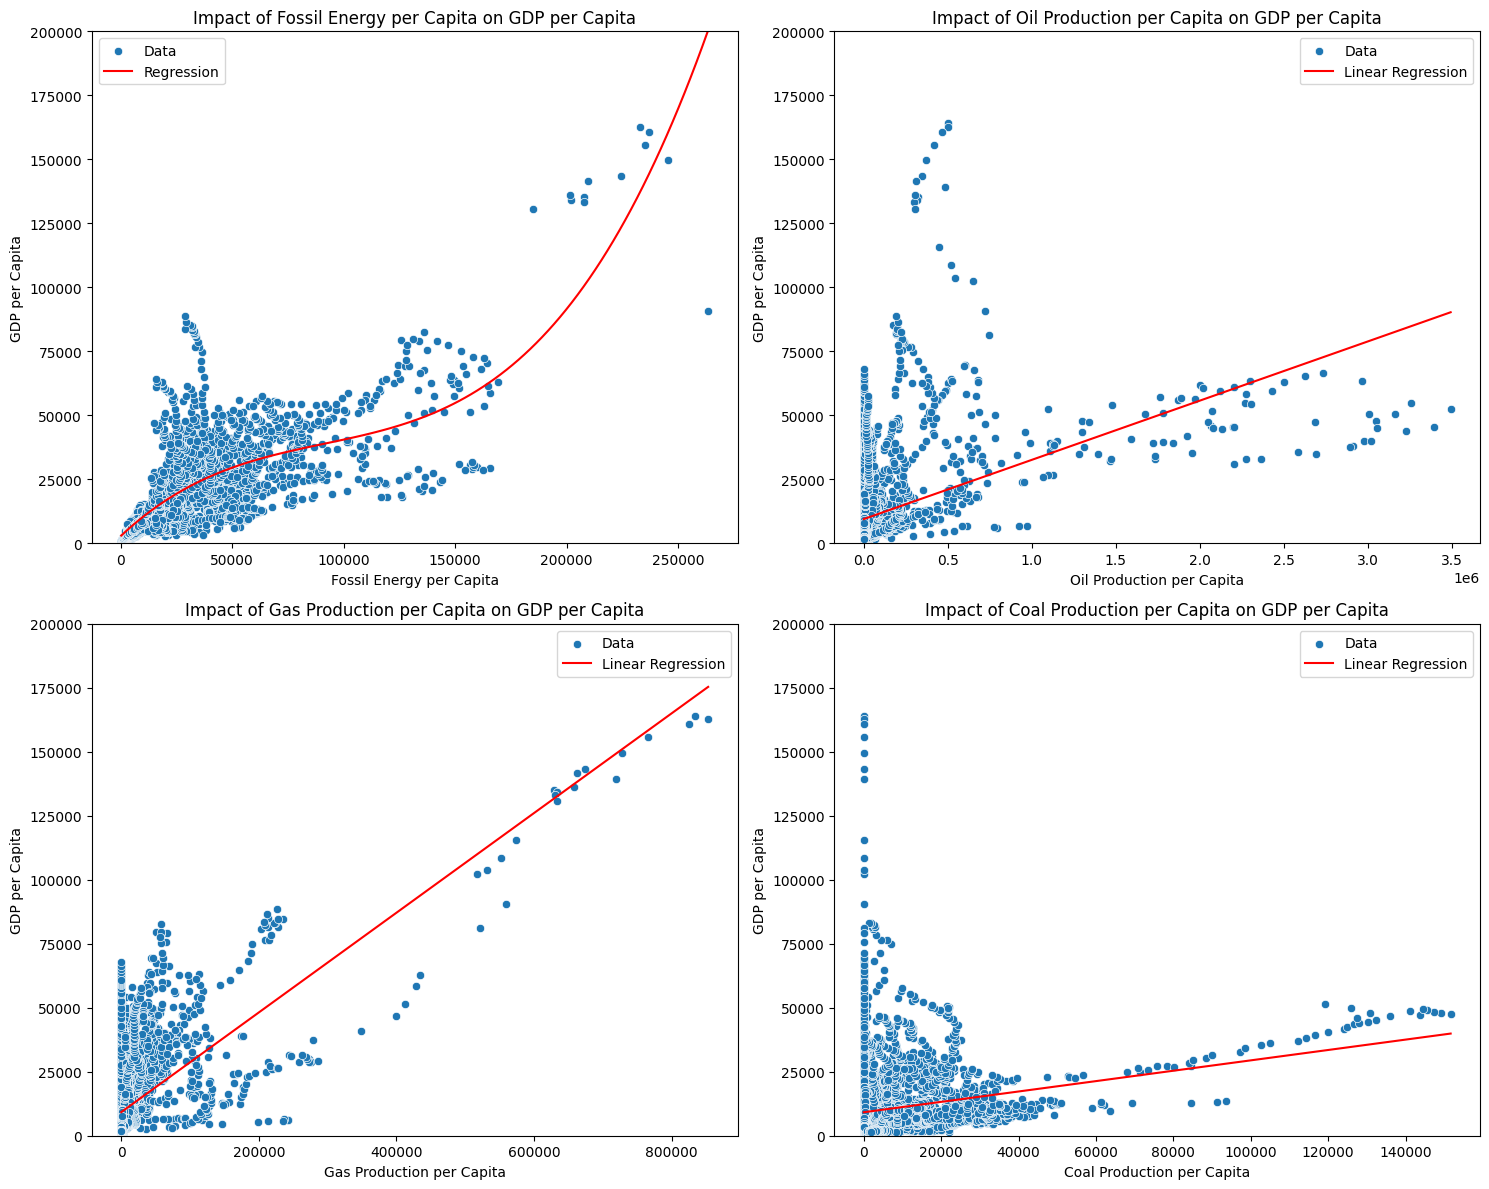

In [140]:



energy_sources = {
    "fossil_energy_per_capita": "Fossil Energy per Capita",  
    "oil_prod_per_capita": "Oil Production per Capita",      
    "gas_prod_per_capita": "Gas Production per Capita",
    "coal_prod_per_capita": "Coal Production per Capita"
}


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()


poly_degree = 3
for idx, (energy_column, title) in enumerate(energy_sources.items()):

    df["energy_per_capita"] = df[energy_column]


    df_regr = df.dropna(subset=["energy_per_capita", "gdp_per_capita"])


    X = df_regr[["energy_per_capita"]].values
    y = df_regr["gdp_per_capita"].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if idx == 0:

        poly = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)


        X_range = np.linspace(df_regr["energy_per_capita"].min(), df_regr["energy_per_capita"].max(), 100).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)
        
        label = "Regression"
    else:

        model = LinearRegression()
        model.fit(X_train, y_train)


        X_range = np.linspace(df_regr["energy_per_capita"].min(), df_regr["energy_per_capita"].max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(X_range)
        
        label = "Linear Regression"


    sns.scatterplot(x="energy_per_capita", y="gdp_per_capita", data=df_regr, ax=axes[idx], label="Data")
    axes[idx].plot(X_range, y_range_pred, color="red", label=label)
    axes[idx].set_xlabel(title)
    axes[idx].set_ylabel("GDP per Capita")
    axes[idx].set_ylim(0, 200000)
    axes[idx].set_title(f"Impact of {title} on GDP per Capita")
    axes[idx].legend()

plt.tight_layout()
plt.show()






**Correlation Insights: Fossil Fuels vs. Solar Energy**

While the production of oil, gas, and coal demonstrates a direct correlation with the standard of living, their consumption shows little to no significant correlation with it. Interestingly, GDP exhibits a noteworthy correlation with solar energy consumption, which we will demonstrate in subsequent analysis.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1514629295.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1514629295.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1514629295.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




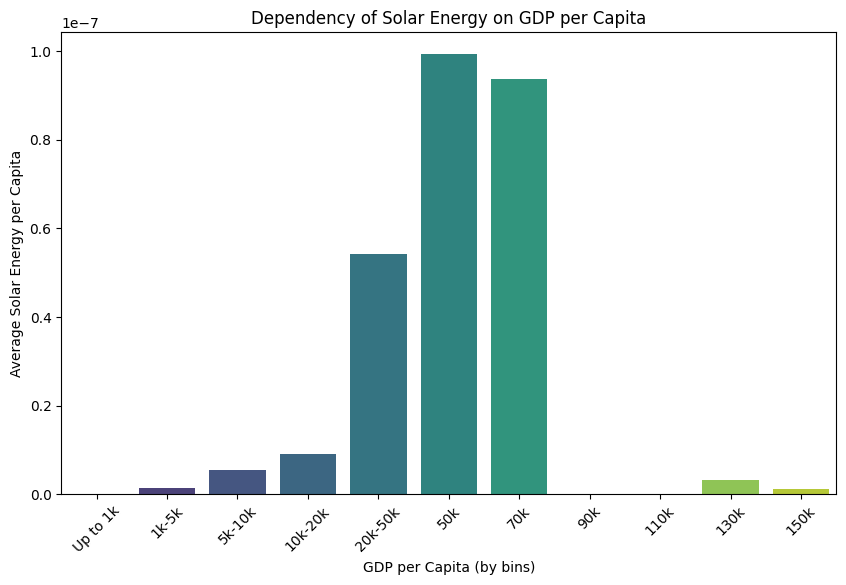

In [ ]:

df["solar_electricity_per_capita"] = df["solar_electricity"] / df["population"]

df_regr = df.dropna(subset=["solar_electricity_per_capita", "gdp_per_capita"])

X = df_regr[["gdp_per_capita"]].values  
y = df_regr["solar_electricity_per_capita"].values  

bin_edges = [0, 1000, 5000, 10000, 20000, 50000, 70000, 90000, 110000, 130000, 150000, df_regr["gdp_per_capita"].max()]
bin_labels = ['Up to 1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k', '70k', '90k', '110k', '130k', '150k']
df_regr['gdp_bin'] = pd.cut(df_regr['gdp_per_capita'], bins=bin_edges, labels=bin_labels, include_lowest=True)

grouped = df_regr.groupby('gdp_bin')['solar_electricity_per_capita'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gdp_bin', y='solar_electricity_per_capita', data=grouped, palette="viridis")
plt.xlabel("GDP per Capita (by bins)")
plt.ylabel("Average Solar Energy per Capita")
plt.title("Dependency of Solar Energy on GDP per Capita")
plt.xticks(rotation=45)
plt.show()




As observed, solar energy is primarily utilized by countries with economic indicators comparable to those of Central Asian nations. This trend is largely influenced by geographical location, which also explains the correlation between solar energy usage and greenhouse gas emissions.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1929356073.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1929356073.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\1929356073.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




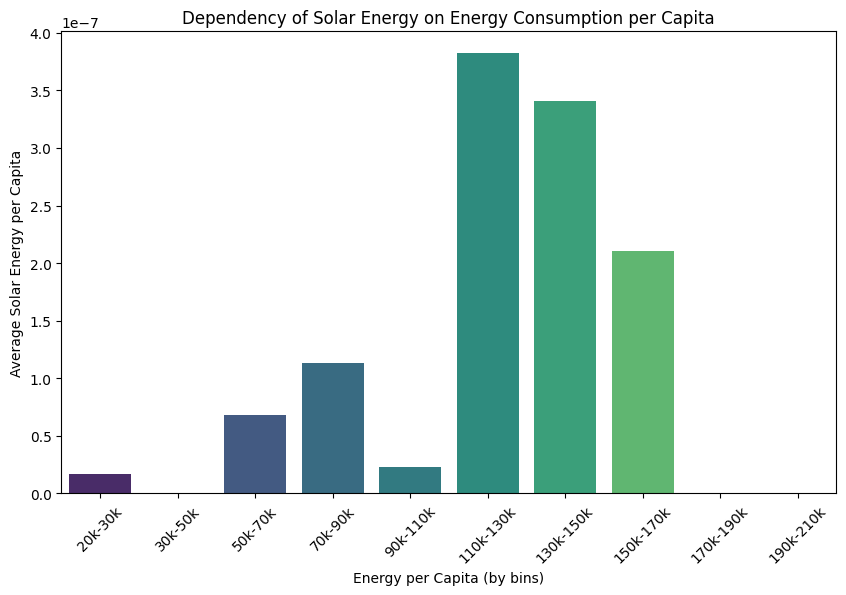

In [ ]:




df_regr = df.dropna(subset=["solar_energy_per_capita", "energy_per_capita"])


X = df_regr[["energy_per_capita"]].values  
y = df_regr["solar_electricity_per_capita"].values 


bin_edges = [20000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000]
bin_labels = ['20k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k', '130k-150k', '150k-170k', '170k-190k', '190k-210k']

df_regr['energy_bin'] = pd.cut(df_regr['energy_per_capita'], bins=bin_edges, labels=bin_labels, include_lowest=True)


grouped = df_regr.groupby('energy_bin')['solar_electricity_per_capita'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='energy_bin', y='solar_electricity_per_capita', data=grouped, palette="viridis")
plt.xlabel("Energy per Capita (by bins)")
plt.ylabel("Average Solar Energy per Capita")
plt.title("Dependency of Solar Energy on Energy Consumption per Capita")
plt.xticks(rotation=45)
plt.show()

Despite these observations, it is clear that solar energy is being actively adopted by countries undergoing significant development. This can be contrasted by comparing per capita energy consumption figures for solar energy with those for coal, highlighting differences in energy strategies between developing and established economies.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\2660021039.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\2660021039.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_21396\2660021039.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




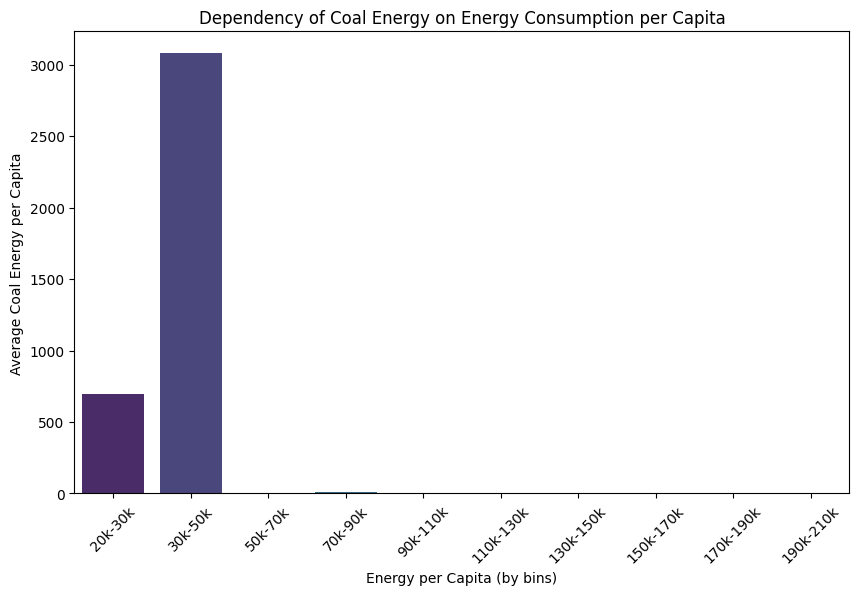

In [210]:



df_regr = df.dropna(subset=["coal_elec_per_capita", "energy_per_capita"])


X = df_regr[["energy_per_capita"]].values  
y = df_regr["coal_elec_per_capita"].values 


bin_edges = [20000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000]
bin_labels = ['20k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k', '130k-150k', '150k-170k', '170k-190k', '190k-210k']

df_regr['energy_bin'] = pd.cut(df_regr['energy_per_capita'], bins=bin_edges, labels=bin_labels, include_lowest=True)


grouped = df_regr.groupby('energy_bin')['coal_elec_per_capita'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='energy_bin', y='coal_elec_per_capita', data=grouped, palette="viridis")
plt.xlabel("Energy per Capita (by bins)")
plt.ylabel("Average Coal Energy per Capita")
plt.title("Dependency of Coal Energy on Energy Consumption per Capita")
plt.xticks(rotation=45)
plt.show()

I aim to analyze how hydropower depends on various factors. According to the heatmap, hydropower demonstrates the highest correlation with economic development levels. Furthermore, it shows an inverse correlation with all types of negative environmental factors, making it a critical component for understanding sustainable energy strategies in relation to economic growth.

It is important to approach the case of hydropower with caution. Countries with high levels of electricity consumption often have the capacity to export gas (resulting in similar patterns in terms of economic development), as well as oil, further bolstering their economies. This economic strength, in turn, enables greater investment in hydropower infrastructure, creating a feedback loop that reinforces this trend.

Mean Squared Error: 143181949.6788455


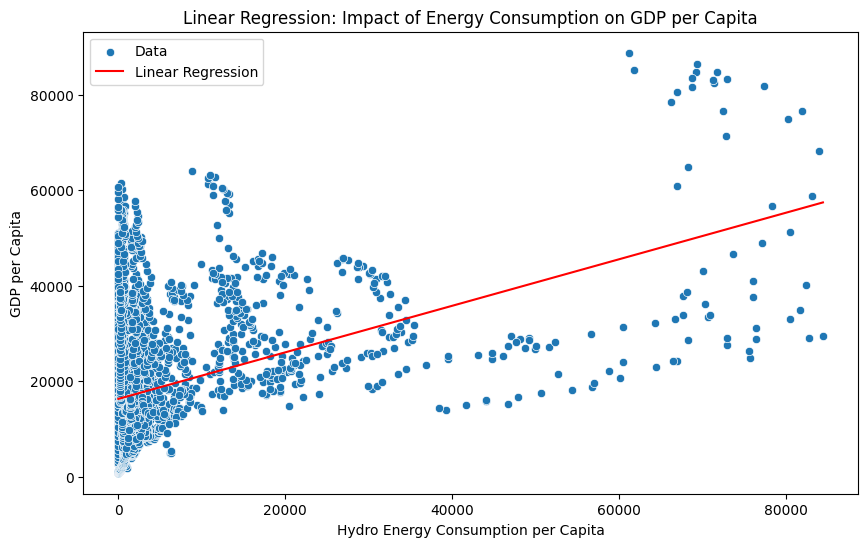

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


df["energy_per_capita"] = df["hydro_energy_per_capita"]
df["gdp_per_capita"] = df["gdp"] / df["population"]


df_regr = df.dropna(subset=["hydro_energy_per_capita", "gdp_per_capita"])
df_regr = df_regr[df_regr["energy_per_capita"] <= 90000]

X = df_regr[["energy_per_capita"]].values 
y = df_regr["gdp_per_capita"].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="energy_per_capita", y="gdp_per_capita", data=df_regr, label="Data")

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)


plt.plot(X_range, y_range_pred, color="red", label="Linear Regression")
plt.xlabel("Hydro Energy Consumption per Capita")
plt.ylabel("GDP per Capita")
plt.title("Linear Regression: Impact of Energy Consumption on GDP per Capita")
plt.legend()
plt.show()


Countries that transitioned to hydropower often had an abundance of oil, as evidenced by the strong correlation between surplus gas production and hydropower usage. This abundance allowed these nations to construct hydropower plants without significantly harming their economies.

Furthermore, once hydropower infrastructure is established, it enables the export of fossil fuels, freeing up additional resources to further stimulate economic growth. This interplay highlights the strategic role of hydropower in diversifying energy resources while supporting economic resilience.

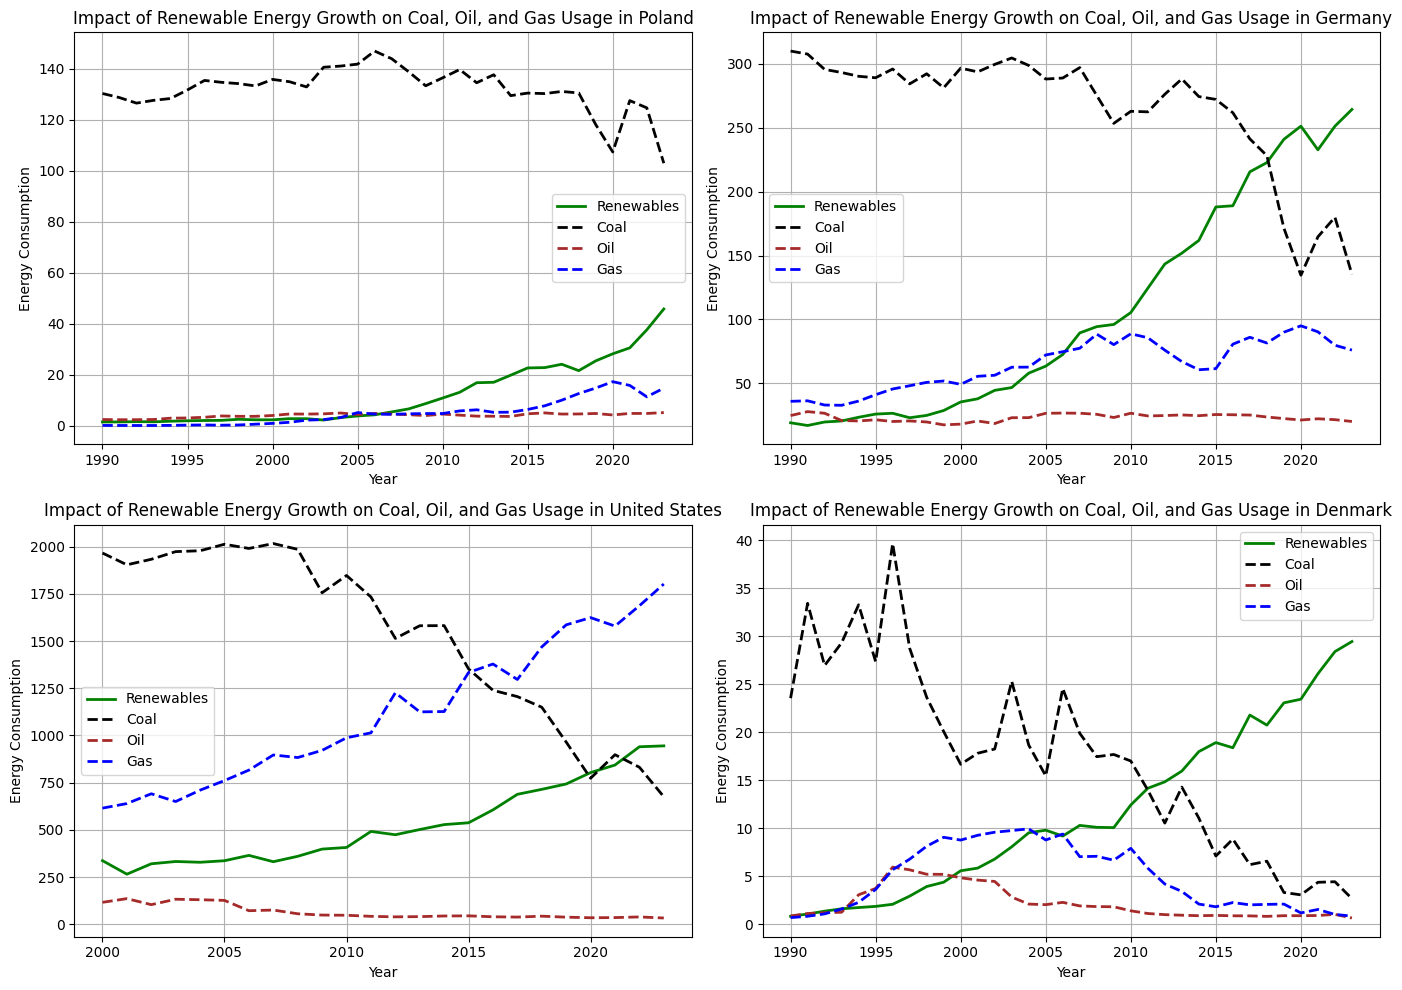

In [211]:



df["renewables"] = (
    df["hydro_electricity"] + df["solar_electricity"] + df["wind_electricity"] + df["biofuel_electricity"]
)
df["coal"] = df["coal_electricity"]
df["oil"] = df["oil_electricity"]
df["gas"] = df["gas_electricity"]


countries = ["Poland", "Germany", "United States", "Denmark"]
df_filtered = df[df["country"].isin(countries)]


plt.figure(figsize=(14, 10))
for i, country in enumerate(countries, 1):
    country_data = df_filtered[df_filtered["country"] == country][["year", "renewables", "coal", "oil", "gas"]].dropna()
    

    plt.subplot(2, 2, i)
    plt.plot(country_data["year"], country_data["renewables"], label="Renewables", color="green", linewidth=2)
    plt.plot(country_data["year"], country_data["coal"], label="Coal", color="black", linestyle="--", linewidth=2)
    plt.plot(country_data["year"], country_data["oil"], label="Oil", color="brown", linestyle="--", linewidth=2)
    plt.plot(country_data["year"], country_data["gas"], label="Gas", color="blue", linestyle="--", linewidth=2)
    

    plt.xlabel("Year")
    plt.ylabel("Energy Consumption")
    plt.title(f"Impact of Renewable Energy Growth on Coal, Oil, and Gas Usage in {country}")
    plt.legend()
    plt.grid(True)


plt.tight_layout()
plt.show()


These graphs highlight successful cases of green energy adoption and illustrate which resources countries prioritize reducing consumption of first. They provide a clear view of the strategic shifts in energy policies, shedding light on how nations aim to transition towards more sustainable energy sources while managing their existing resources efficiently.

Poland - Mean Squared Error (degree=3): 37.98603054810683
Germany - Mean Squared Error (degree=3): 162.64059573605215
United States - Mean Squared Error (degree=3): 4787.714736796989
Denmark - Mean Squared Error (degree=3): 17.462437382441145


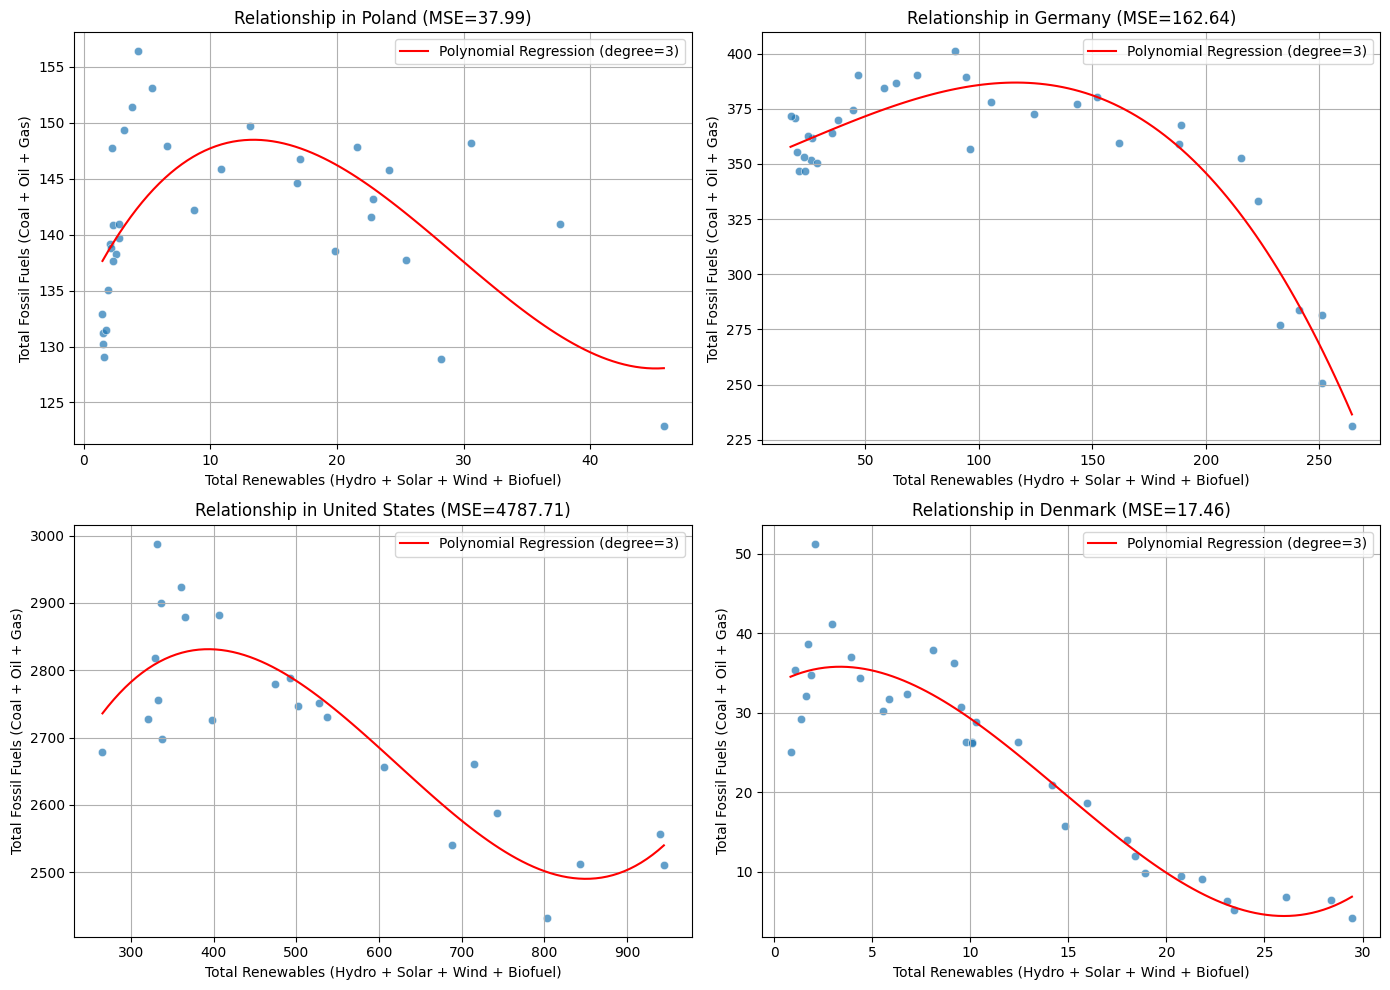

In [212]:

countries = ["Poland", "Germany", "United States", "Denmark"]

df_filtered = df[df["country"].isin(countries)].copy()

df_filtered["renewables_total"] = (
    df_filtered["hydro_electricity"] + df_filtered["solar_electricity"] +
    df_filtered["wind_electricity"] + df_filtered["biofuel_electricity"]
)
df_filtered["fossil_fuels_total"] = df_filtered["coal"] + df_filtered["oil"] + df_filtered["gas"]

df_filtered = df_filtered.dropna(subset=["renewables_total", "fossil_fuels_total"])


plt.figure(figsize=(14, 10))
degree = 3 
for i, country in enumerate(countries, 1):

    country_data = df_filtered[df_filtered["country"] == country]
    X = country_data[["renewables_total"]].values
    y = country_data["fossil_fuels_total"].values

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    print(f"{country} - Mean Squared Error (degree={degree}):", mse)
 
    plt.subplot(2, 2, i)
    sns.scatterplot(x="renewables_total", y="fossil_fuels_total", data=country_data, alpha=0.7)
    plt.plot(X_range, y_range_pred, color="red", label=f"Polynomial Regression (degree={degree})")

    plt.xlabel("Total Renewables (Hydro + Solar + Wind + Biofuel)")
    plt.ylabel("Total Fossil Fuels (Coal + Oil + Gas)")
    plt.title(f"Relationship in {country} (MSE={mse:.2f})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()




На тепловой карте также можно заметить, что солнечная энергия имеет наибольшее количество кореляций со стандартными источниками энергии. Это может быть связано с тем, что солнечная энергия доступнее других с точки зрения технологий и стоимости, а потому может быть отправной точкой для энергетического перехода. 

Mean Squared Error (Wind): 1190.1602702054456
Mean Squared Error (Hydro): 81473.79970174571


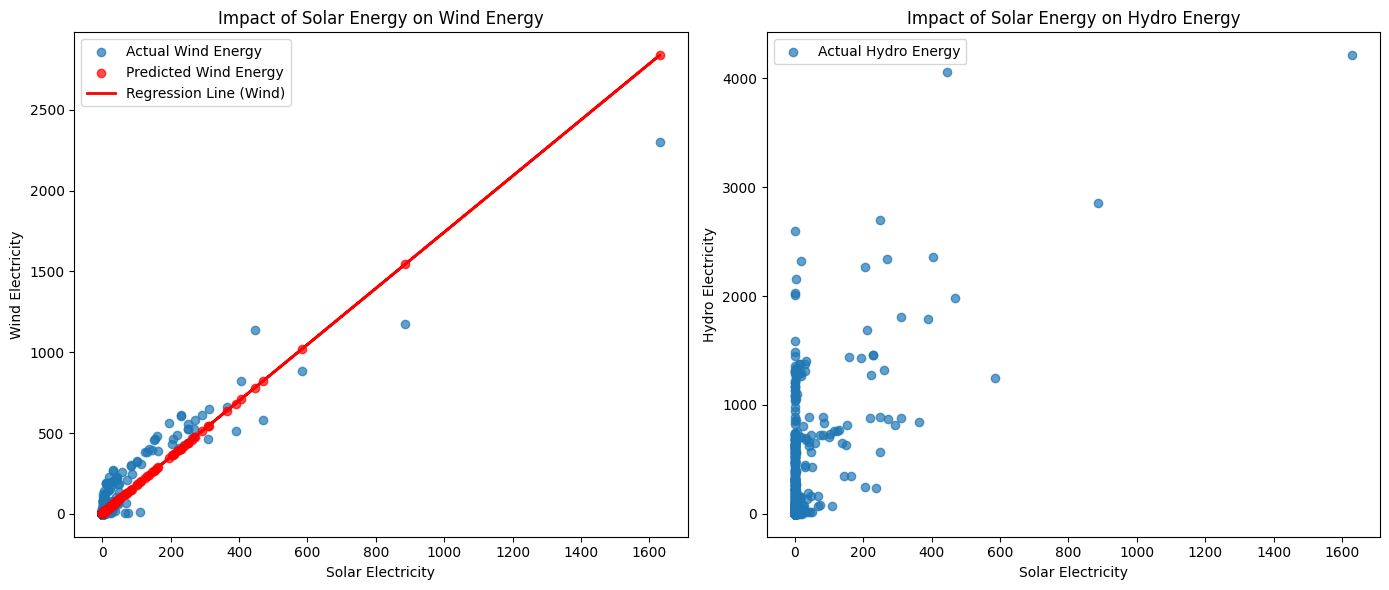

In [213]:

df_clean = df.dropna(subset=["solar_electricity", "wind_electricity", "hydro_electricity"]).copy()

X = df_clean[["solar_electricity"]].values  
y = df_clean[["wind_electricity", "hydro_electricity"]].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_wind = mean_squared_error(y_test[:, 0], y_pred[:, 0])  
mse_hydro = mean_squared_error(y_test[:, 1], y_pred[:, 1]) 
print("Mean Squared Error (Wind):", mse_wind)
print("Mean Squared Error (Hydro):", mse_hydro)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test[:, 0], label="Actual Wind Energy", alpha=0.7)
plt.scatter(X_test, y_pred[:, 0], label="Predicted Wind Energy", color="red", alpha=0.7)
plt.plot(X_test, y_pred[:, 0], color="red", linewidth=2, label="Regression Line (Wind)")
plt.xlabel("Solar Electricity")
plt.ylabel("Wind Electricity")
plt.title("Impact of Solar Energy on Wind Energy")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test[:, 1], label="Actual Hydro Energy", alpha=0.7)

plt.xlabel("Solar Electricity")
plt.ylabel("Hydro Electricity")
plt.title("Impact of Solar Energy on Hydro Energy")
plt.legend()

plt.tight_layout()
plt.show()


The illustrations depict the correlation between the development of solar and wind energy, as well as solar and hydropower. The graphs demonstrate a strong correlation between the growth of solar and wind energy, indicating that these renewable sources develop in tandem. However, no such correlation is observed between solar energy and hydropower, suggesting that these energy types are influenced by distinct factors and strategies within energy development policies.

Mean Squared Error: 77542.60488578405


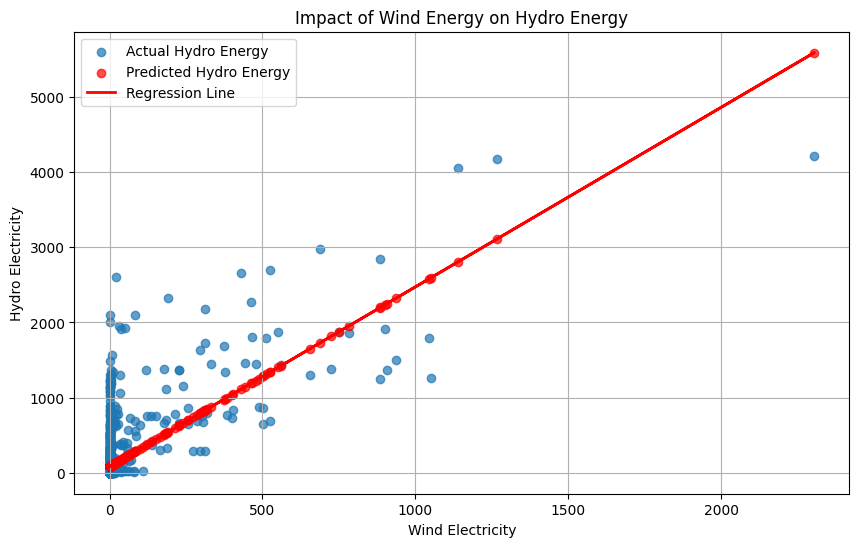

In [214]:

df_clean = df.dropna(subset=["wind_electricity", "hydro_electricity"]).copy()

X = df_clean[["wind_electricity"]].values  
y = df_clean["hydro_electricity"].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Hydro Energy", alpha=0.7)
plt.scatter(X_test, y_pred, label="Predicted Hydro Energy", color="red", alpha=0.7)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Wind Electricity")
plt.ylabel("Hydro Electricity")
plt.title("Impact of Wind Energy on Hydro Energy")
plt.legend()
plt.grid(True)
plt.show()


At the same time, there is a clear correlation between wind energy and hydropower development. However, the accuracy of the regression is lower due to the higher threshold required for the implementation of hydropower infrastructure. This suggests that while these energy sources often coexist within the same development frameworks, hydropower's large-scale deployment poses additional economic and geographic challenges.

This information suggests that countries transitioning to green energy tend to adopt a combination of different approaches to renewable energy production. However, based on their economic development and the availability of free resources within their economies, solar, wind, and hydropower can be aligned with three distinct stages of national development:

1) **Solar Energy**: Often adopted in the initial stages due to its lower technological and financial barriers, making it accessible for countries with limited resources. Additionally, most developing countries are located within geographic latitudes where solar energy is most efficient.

2) **Wind Energy**: Typically developed as economies grow and more capital becomes available, offering a scalable solution for renewable energy production.

3) **Hydro Energy**: Reserved for the later stages of development, as it requires significant investment, advanced infrastructure, and favorable geographical conditions.
